# Simple regular geometries

In [1]:
import pycpt
import numpy as np

from time import clock
import fillit as pitfill

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable

label_size = 8
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

In [2]:
import pandas as pd

In [3]:
cgraph = pd.read_csv("cgraph.csv")

IOError: File cgraph.csv does not exist

In [4]:
c12 = np.concatenate((cgraph['source'].values,cgraph['target'].values))
cmax = np.max(np.bincount(c12.astype(int)))

NameError: name 'cgraph' is not defined

In [14]:
cmax

144

In [23]:
cgraph

,Unnamed: 0,source,target,weight
0,330,167,0,9.101304
1,329,168,0,9.162960
2,322,167,168,9.246714
3,328,169,0,10.000000
4,331,170,0,10.000000
5,396,167,170,10.001666
6,395,168,169,10.002662
7,397,167,169,10.018043
8,18,0,0,17.000000
9,17,1,0,17.000000


In [28]:
cgraph.values[:,3].min(),cgraph.values[:,3].max()

(9.10130394513181, 1297.3861515093345)

In [26]:
cgraph.values[:,1]

array([167., 168., 167., ..., 465., 440., 478.])

In [17]:
ncol = cgraph.values.shape[1]
if ncol>3:
    val = cgraph.values[:,ncol-3:]
    
val.shape,int(max(val[:,1])+1)

((2365, 3), 1145)

In [18]:
#cgraph
from fillit import _fillZhou as fzhou

In [19]:
fzhou.graphfill(int(max(val[:,1])+1),val,cmax)

array([-1.00000000e+08,  1.70000000e+01,  1.80000000e+01, ...,
        6.98241323e+02,  7.45980181e+02,  8.03994077e+02])

## Plotting functions

In [7]:
def plotElevation( data, cmin, cmax, colormap):
    '''
    data: dataset to plot
    zmin,zmax: extent of the colormap
    colormap: to use    
    '''
    
    # Figure size is defined here
    fig = plt.figure(1, figsize=(6,6))
    
    ax = plt.gca()
    im = ax.imshow(data, interpolation='nearest', cmap=colormap,
                     vmin=cmin, vmax=cmax)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)
    cbar = plt.colorbar(im,cax=cax)
    plt.tight_layout()

    plt.show()
    plt.close(fig)

## Surface definition

In [5]:
dx = 0.01
minX, maxX = 0.0, 10.0
minY, maxY = 0.0, 10.0

nx = int((maxX - minX)/dx)+1
ny = int((maxY - minY)/dx)+1

xcoords = np.linspace(minX, maxX, nx)
ycoords = np.linspace(minY, maxY, ny)

X, Y = np.meshgrid(xcoords, ycoords)

coords = np.vstack([X.ravel(), Y.ravel()])


height  = 1.0 - (np.sin(0.5*X*np.pi)**2 * np.sin(0.5*Y*np.pi)**2)
#height  += np.random.random(height.shape) * 0.001
height  += 0.25 * (X + 0.5*Y)

dem = height.reshape((ny,nx))

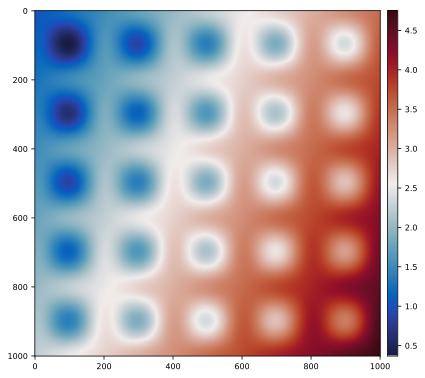

In [8]:
diffcmap = pycpt.load.cmap_from_cptcity_url('cmocean/balance.cpt')
plotElevation( dem, dem.min(), dem.max(), diffcmap)

# Perform pit filling

We will now perform pit filling using one of the available priority-flood algorithms available in `fillit`.

For regular grids, the following `classes` are available:
+ `depressionFillingZhou`
+ `depressionFillingBarnes`

***

These 2 classes are based on the following papers:

Barnes, Lehman, Mulla. "Priority-Flood: An Optimal Depression-Filling and
Watershed-Labeling Algorithm for Digital Elevation Models". Computers & Geosciences.
Vol 62, Jan 2014, pp 117–127 - [link](https://www.sciencedirect.com/science/article/pii/S0098300413001337)

Zhou, Sun, Fu. "An efficient variant of the Priority-Flood algorithm for filling
depressions in raster digital elevation models". Computers & Geosciences.
Vol 90, Feb 2016, pp 87–96 - [link](https://www.sciencedirect.com/science/article/pii/S0098300416300553)

***

To call one of these classes, you will typically do as follows:

``` python
import fillit as pitfill

# Class initialisation
pitClass = pitfill.depressionFillingBarnes(dem)

# Performing pit filling
fillZ = pitClass.performPitFillingSruct()

```

Here we illustrate how this is done for the 2 classes...

### Barnes (2014)

In [ ]:
t0 = clock()
fillB = pitfill.depressionFillingBarnes(dem)
filledB = fillB.performPitFillingStruct()
print('\n+ Pit filling - Priority-flood Barnes Algorithm 2014 (%0.02f seconds)'% (clock() - t0))

### Zhou (2016)

It is worth mentionning that the performance of Zhou's algorithm in `fillit` performed a bit slower than the Barnes'one mainly because it also computes additional information such as pit labelling, pit volume evaluation, watershed definition and spill-over graph...

In [ ]:
t0 = clock()
fillZ = pitfill.depressionFillingZhou(dem,cartesian=True)
filledZ, LabelsZ, wLabelsZ, graph = fillZ.performPitFillingStruct(simple=False)
print('\n+ Pit filling - Priority-flood Zhou Algorithm 2014 (%0.02f seconds)'% (clock() - t0))

In [ ]:
cgraph2 = pd.DataFrame(cgraph,columns=['source','target','weight'])

In [ ]:
cgraph.values.shape
ncol = cgraph.values.shape[1]
if ncol>3:
    val = cgraph.values[:,ncol-3:]
    
val.shape

In [ ]:
fillZ.fillGraph(cgraph2.values,cmax)

In [ ]:
print('+ Pit filling elevation difference between Zhou & Barnes: \n \t \t min: %0.02f - max: %0.02f \n' % ((filledB-filledZ).min(),(filledB-filledZ).max()))

We can visualise the filled elevation differences with the initial digital elevation model

In [ ]:
print('\t\t\t Zhou\'s pit filling')
topocmap = pycpt.load.cmap_from_cptcity_url('cmocean/amp.cpt')
plotElevation(filledZ-dem, 0, 0.4, topocmap)

# Perform pit filling with epsilon

Only implemented for the Barnes algorithm...

## Barnes' algo

In [ ]:
t0 = clock()
fillB2 = pitfill.depressionFillingBarnes(dem,eps=1.e-12,cartesian=True,first=0)
filledB2 = fillB2.performPitFillingStruct()
print('\n+ Pit filling+epsilon - Priority-flood Barnes Algorithm 2014 (%0.02f seconds)'% (clock() - t0))

In [ ]:
print('\t\t Barnes pit filling + eps')
plotElevation( filledB2, filledB2.min(), filledB2.max(), diffcmap)

print('\t\t Difference with or whithout eps')
plotElevation( filledB2-filledB, (filledB2-filledB).min(), (filledB2-filledB).max(), diffcmap)